In [1]:
# ! pip install wwo-hist

In [6]:
# from wwo_hist import retrieve_hist_data

# import os
# os.chdir('/content/drive/My Drive/Untitled Folder')

In [9]:
# FREQUENCY = 3
# START_DATE = '11-DEC-2018'
# END_DATE = '11-MAR-2019'
# API_KEY= 'ed802abb3d3a42f7a5e164105202208'
# LOCATION_LIST = ['tehran', 'iran']
# hist_weather_data =  retrieve_hist_data(API_KEY,
#                                         LOCATION_LIST,
#                                         START_DATE,
#                                         END_DATE,
#                                         FREQUENCY,
#                                         location_label = False,
#                                         export_csv = True,
#                                         store_df = True)



Retrieving weather data for tehran


Currently retrieving data for tehran: from 2018-12-11 to 2018-12-31
Time elapsed (hh:mm:ss.ms) 0:00:01.379796
Currently retrieving data for tehran: from 2019-01-01 to 2019-01-31
Time elapsed (hh:mm:ss.ms) 0:00:02.936496
Currently retrieving data for tehran: from 2019-02-01 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:04.352956
Currently retrieving data for tehran: from 2019-03-01 to 2019-03-11
Time elapsed (hh:mm:ss.ms) 0:00:05.199424


export tehran completed!




Retrieving weather data for iran


Currently retrieving data for iran: from 2018-12-11 to 2018-12-31
Time elapsed (hh:mm:ss.ms) 0:00:01.116453
Currently retrieving data for iran: from 2019-01-01 to 2019-01-31
Time elapsed (hh:mm:ss.ms) 0:00:02.553162
Currently retrieving data for iran: from 2019-02-01 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:03.947004
Currently retrieving data for iran: from 2019-03-01 to 2019-03-11
Time elapsed (hh:mm:ss.ms) 0:00:04.740169


export iran completed

In [55]:
import pandas as pd

data =  pd.read_csv('/content/drive/My Drive/Untitled Folder/tehran.csv')
data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2018-12-11 00:00:00,12,6,0.0,8.7,3,21,11:10 AM,09:30 PM,08:04 AM,05:52 PM,-2,9,9,9,5,5,44,0.0,1018,8,10,315,4,tehran
1,2018-12-11 03:00:00,12,6,0.0,8.7,3,21,11:10 AM,09:30 PM,08:04 AM,05:52 PM,-2,8,9,8,9,5,46,0.0,1018,7,10,308,7,tehran
2,2018-12-11 06:00:00,12,6,0.0,8.7,3,21,11:10 AM,09:30 PM,08:04 AM,05:52 PM,-2,8,8,8,7,3,49,0.0,1019,6,10,304,5,tehran
3,2018-12-11 09:00:00,12,6,0.0,8.7,3,21,11:10 AM,09:30 PM,08:04 AM,05:52 PM,-1,11,11,11,9,2,41,0.0,1019,9,10,285,8,tehran
4,2018-12-11 12:00:00,12,6,0.0,8.7,3,21,11:10 AM,09:30 PM,08:04 AM,05:52 PM,-1,13,13,13,9,2,36,0.0,1018,11,10,279,8,tehran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2019-03-11 09:00:00,14,8,0.0,11.6,4,32,10:03 AM,11:37 PM,07:22 AM,07:08 PM,-6,11,11,11,3,7,30,0.0,1015,11,10,221,3,tehran
724,2019-03-11 12:00:00,14,8,0.0,11.6,4,32,10:03 AM,11:37 PM,07:22 AM,07:08 PM,-5,12,13,12,9,6,28,0.0,1014,13,10,258,8,tehran
725,2019-03-11 15:00:00,14,8,0.0,11.6,4,32,10:03 AM,11:37 PM,07:22 AM,07:08 PM,-7,13,14,13,14,6,22,0.0,1014,14,10,296,12,tehran
726,2019-03-11 18:00:00,14,8,0.0,11.6,4,32,10:03 AM,11:37 PM,07:22 AM,07:08 PM,-6,10,12,10,11,6,22,0.0,1015,10,10,315,9,tehran


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          728 non-null    object 
 1   maxtempC           728 non-null    int64  
 2   mintempC           728 non-null    int64  
 3   totalSnow_cm       728 non-null    float64
 4   sunHour            728 non-null    float64
 5   uvIndex            728 non-null    int64  
 6   moon_illumination  728 non-null    int64  
 7   moonrise           728 non-null    object 
 8   moonset            728 non-null    object 
 9   sunrise            728 non-null    object 
 10  sunset             728 non-null    object 
 11  DewPointC          728 non-null    int64  
 12  FeelsLikeC         728 non-null    int64  
 13  HeatIndexC         728 non-null    int64  
 14  WindChillC         728 non-null    int64  
 15  WindGustKmph       728 non-null    int64  
 16  cloudcover         728 non

In [57]:
data.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,728.000000,728.000000,728.0,728.000000,728.00000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,11.120879,5.549451,0.0,9.426374,3.00000,45.890110,-5.880495,7.407967,8.890110,7.407967,13.568681,24.167582,36.328297,0.251374,1018.239011,8.343407,10.130495,207.090659,10.097527
std,2.326027,1.969583,0.0,1.601982,0.71147,30.841638,3.941910,3.649317,2.860635,3.649317,9.583957,31.220156,12.476472,1.101255,5.706293,2.808454,2.195595,126.783486,6.930196
min,4.000000,0.000000,0.0,4.900000,1.00000,0.000000,-16.000000,-5.000000,0.000000,-5.000000,0.000000,0.000000,13.000000,0.000000,998.000000,-2.000000,2.000000,0.000000,0.000000
25%,9.000000,4.000000,0.0,8.700000,3.00000,19.000000,-9.000000,5.000000,7.000000,5.000000,6.000000,3.000000,27.000000,0.000000,1016.000000,7.000000,10.000000,65.000000,5.000000
50%,11.000000,6.000000,0.0,10.000000,3.00000,44.000000,-6.000000,8.000000,9.000000,8.000000,11.000000,8.000000,34.000000,0.000000,1019.000000,8.000000,10.000000,291.000000,8.000000
75%,13.000000,7.000000,0.0,10.400000,3.00000,73.000000,-3.000000,10.000000,11.000000,10.000000,19.000000,33.000000,43.000000,0.000000,1022.000000,10.000000,10.000000,311.000000,14.000000
max,17.000000,9.000000,0.0,11.600000,4.00000,100.000000,6.000000,19.000000,19.000000,19.000000,51.000000,100.000000,83.000000,15.500000,1034.000000,17.000000,20.000000,360.000000,38.000000


In [78]:
df = data[['tempC']]

In [79]:
df

,tempC
0,8
1,7
2,6
3,9
4,11
...,...
723,11
724,13
725,14
726,10


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



train_split= 0.9
split_idx = int(len(df) * 0.9)
training_set = df[:split_idx].values
test_set = df[split_idx:].values




In [81]:
training_set.shape

(655, 1)

In [82]:
test_set.shape

(73, 1)

In [83]:
# 5-day prediction using 30 days data
x_train = []
y_train = []
n_future = 7 #Next 5 days trmpreature forecast
n_past = 30 #Past 30 days
for i in range(0, len(training_set) - n_past - n_future + 1):
    x_train.append(training_set[i : i + n_past, 0])
    y_train.append(training_set[i + n_past : i + n_past + n_future, 0])

In [84]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))
x_train.shape

(619, 30, 1)

In [85]:
import tensorflow as tf

x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional


regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future, activation='relu'))
regressor.compile( optimizer='adam',
loss='mean_squared_error',
metrics=['acc'])
regressor.fit(x_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
20/20 [==============================] - 1s 45ms/step - loss: 64.7604 - acc: 0.1357
Epoch 2/500
20/20 [==============================] - 1s 50ms/step - loss: 53.7865 - acc: 0.1099
Epoch 3/500
20/20 [==============================] - 1s 54ms/step - loss: 44.3425 - acc: 0.1050
Epoch 4/500
20/20 [==============================] - 1s 48ms/step - loss: 36.4889 - acc: 0.1066
Epoch 5/500
20/20 [==============================] - 1s 47ms/step - loss: 28.7950 - acc: 0.1195
Epoch 6/500
20/20 [==============================] - 1s 47ms/step - loss: 22.8240 - acc: 0.1115
Epoch 7/500
20/20 [==============================] - 1s 46ms/step - loss: 18.7393 - acc: 0.1147
Epoch 8/500
20/20 [==============================] - 1s 49ms/step - loss: 15.8337 - acc: 0.1163
Epoch 9/500
20/20 [==============================] - 1s 50ms/step - loss: 13.5409 - acc: 0.1212
Epoch 10/500
20/20 [==============================] - 1s 50ms/step - loss: 12.1860 - acc: 0.1260
Epoch 11/500
20/20 [===================

In [87]:

x_test = test_set[: n_past, 0]
y_test = test_set[n_past : n_past + n_future, 0]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))
predicted_temperature = regressor.predict(x_test)
print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(y_test))




Predicted temperature [[12.265116  10.296693   8.431896   8.190758   8.2721615  8.191868
   9.047829 ]]
Real temperature [14 11  7 12 11  9 11]


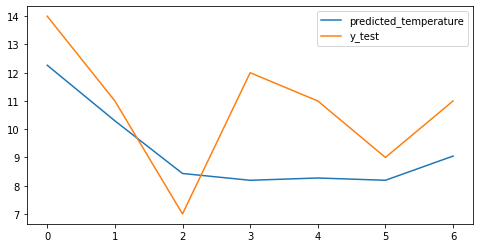

In [91]:
plt.figure(figsize = (8,4) )
plt.plot(predicted_temperature[0], label = 'predicted_temperature')
plt.plot(y_test, label = 'y_test')
plt.legend()
